In [1]:
# Import the necessary libraries, packages, and modules.
# Data analysis:
import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm 

# DataTime:
import datetime
import time

# Visualisation:
import matplotlib.pyplot as plt

# Import data from the web with 'pandas_datareader'. 
from pandas_datareader import data as web
import yfinance as yf  
yf.pdr_override()

# LinearRegression:
from sklearn.linear_model import LinearRegression

# Ignore warnings:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set the start date.
start = datetime.datetime(2021, 1, 1)

# Set the end date.  
end = datetime.datetime(2022, 1, 1)  

# Use the Pandas DataReader to pull data from the web.
# Specify the 'ticket' and the website, as well as the start and end dates.
df_spy = web.get_data_yahoo('SPY', start='2021-01-01', end='2022-01-01')
df_apple = web.get_data_yahoo('AAPL', start='2021-01-01', end='2022-01-01')

# View the DataFrames.
print(df_spy.head())
df_apple.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  375.309998  375.450012  364.820007  368.790009  354.197388   
2021-01-05  368.100006  372.500000  368.049988  371.329987  356.636902   
2021-01-06  369.709991  376.980011  369.119995  373.549988  358.769043   
2021-01-07  376.100006  379.899994  375.910004  379.100006  364.099457   
2021-01-08  380.589996  381.489990  377.100006  381.260010  366.174011   

               Volume  
Date                   
2021-01-04  110210800  
2021-01-05   66426200  
2021-01-06  107997700  
2021-01-07   68766800  
2021-01-08   71677200  


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.331688,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.906021,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.566818,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.817444,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.929291,105158200


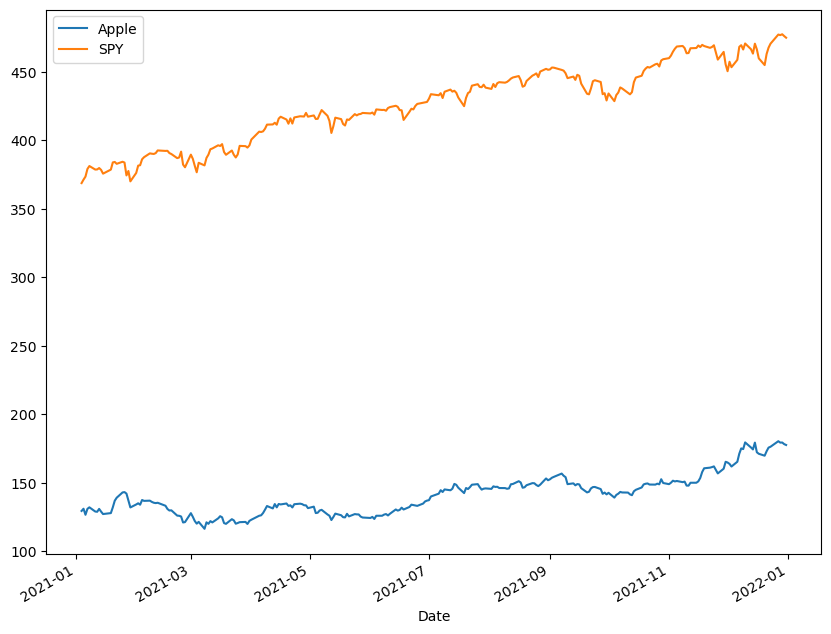

In [5]:
# Closing stock price line plot for 'Apple'.
df_apple['Close'].plot(label = 'Apple', figsize=(10, 8))

# Closing stock price line plot for 'SPY'.
df_spy['Close'].plot(label = 'SPY')
plt.legend()

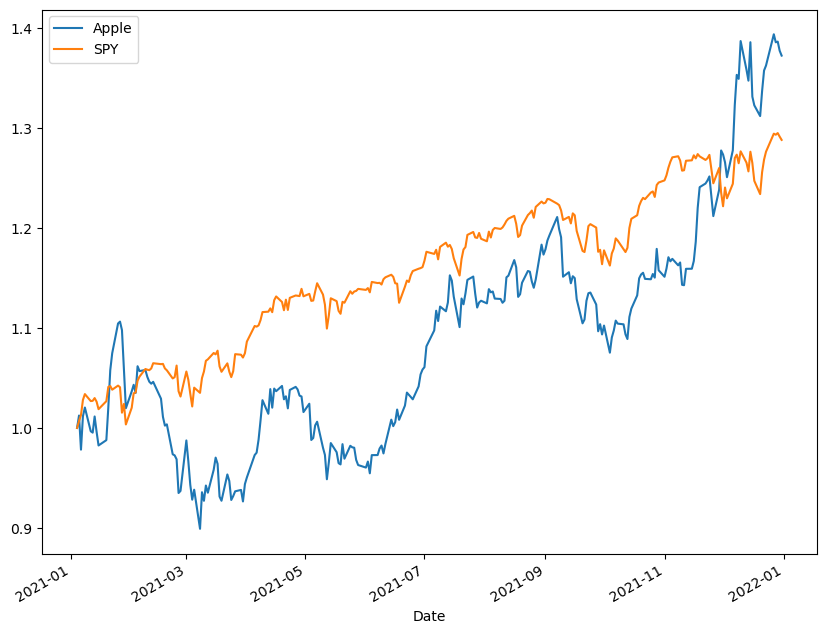

In [6]:
# Calculate the cumulative sum of closing prices for 'Apple' stocks 
# stores sum in a new column named 'Cumu'.
df_apple['Cumu'] = df_apple['Close'] / df_apple['Close'].iloc[0]

# Calculate the cumulative sum of closing prices for 'SPY stocks
# stores sum in a new column named 'Cumu'.
df_spy['Cumu'] = df_spy['Close'] / df_spy['Close'].iloc[0] 

# Plot line graphs for the calculated 'Cumu' columns for 
# both 'Apple' and 'SPY' stocks.
df_apple['Cumu'].plot(label = 'Apple', figsize=(10, 8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

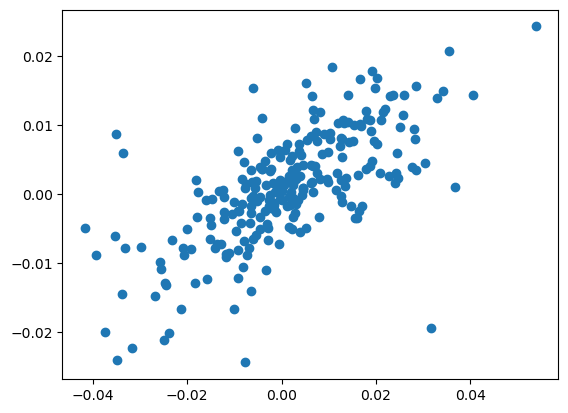

In [7]:
# Calculate daily returns and percentage change using 'pandas pct_change()'.
df_apple['daily_ret'] = df_apple['Close'].pct_change(1) 
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)

# Plot the daily returns on a scatterplot:
plt.scatter(df_apple['daily_ret'],df_spy['daily_ret'])

In [8]:
# Join the DataFrames.
daily_prices = pd.concat([df_apple['Close'], df_spy['Close']], axis=1)  
# Set column labels.
daily_prices.columns = ['Apple', 'SPY']  

# Get the percentage change. 
daily_returns = daily_prices.pct_change(1) 

# Remove the first row.
clean_daily_returns = daily_returns.dropna(axis=0)

# Print the new DataFrame.  
print(clean_daily_returns.shape) 
clean_daily_returns.head()

(251, 2)


,Apple,SPY
Date,,
2021-01-05,0.012364,0.006887
2021-01-06,-0.033662,0.005979
2021-01-07,0.034123,0.014857
2021-01-08,0.008631,0.005698
2021-01-11,-0.023249,-0.006741


In [7]:
# Specify variables, and reshape the data.
X = clean_daily_returns['SPY'].values.reshape(-1, 1)  
y = clean_daily_returns['Apple'].values.reshape(-1, 1)  

# Run the linear regression test.
lr = LinearRegression() 

# Fit the model.
lr.fit(X, y) 

# Print the intercept value.
print("Intercept value: ", lr.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

Intercept value:  [2.68456838e-05]
Coefficient value:  [[1.30313819]]


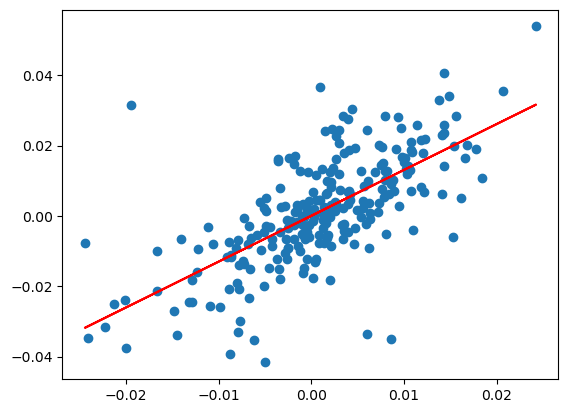

In [8]:
# Set the x coefficient the constant (intercept).
y_pred = lr.intercept_ + lr.coef_ * X 

# Draw the scatterplot using Matplotlib. 
plt.scatter(X, y) 

# Plot X and predicted y as a line. Set the line colour to red.
plt.plot(X, y_pred, color='red') 